# **PREVISÃO DE ACIDENTES DE TRÂNSITO COM VÍTIMAS NA CIDADE DE PORTO ALEGRE UTILIZANDO ALGORITMOS CLASSIFICADORES**

## **Thiago Leal Summchen Valentim**

## **Porto Alegre, 2024**

# **1. Contexto e Definição do Problema**

### As grandes cidades brasileiras enfrentam um desafio persistente e preocupante relacionado à segurança no trânsito. O problema dos acidentes viários se consolida cada vez mais como uma questão crítica, refletindo não apenas o crescimento exponencial da frota de veículos, mas também desafios estruturais, comportamentais e regulatórios. Com o aumento da urbanização e a intensificação das atividades urbanas, os acidentes de trânsito tornaram-se a capacidade da gestão pública de prever a ocorrência de acidentes de trânsito com vítimas, sejam fatais ou apenas ferimentos, é de grande importância para torná-la mais bem preparada para lidar com este tipo de evento, e garantir a segurança e o bem-estar da comunidade.


### Sendo assim, propõe-se neste trabalho a elaboração de um modelo preditivo com o intuito de identificar, dentro dos acidentes ocorridos na cidade de Porto Alegre/RS, aqueles em que há ocorrência de cidadãos feridos e/ou mortos, com base em certas informações sobre o acidente, como dados de localização, momento do dia em que ocorre, quantidade e tipo dos veículos envolvidos, bem como condições meteorológicas.


# **2. Obtenção de Bases de Dados**

### Neste trabalho foram utilizadas duas fontes de dados distintas:

### •	Base de dados da EPTC (Empresa Pública de Transporte e Circulção, de Porto Alegre), obtida no site Dados Abertos POA, com informações referentes aos registros de acidentes de trânsito no município de Porto Alegre,  no período de 2019 a 2023, tipificados de acordo com a existência ou não de pessoas feridas e vítimas fatais. Arquivo CSV baixado no link: https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes

### •	Base de dados obtida no site Meteostat contendo o histórico de condições climáticas diárias na cidade de Porto Alegre. Arquivo em CSV baixado no link: https://meteostat.net/pt/station/83967?t=2019-01-01/2023-12-31  

# **3. Preparação das Bases de Dados**

## **3.1. Base de Acidentes**

In [ ]:
#Importação das bibliotecas necessárias para o tratamento dos dados, e ajuste de display:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

In [ ]:
#carregamento da base de dados
df1 = pd.read_csv('base_acidentes.csv', sep = ';', encoding='utf-8')
df1.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-01-01 01:32:36,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0.00e+00,0.00e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-01-01 01:32:36,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655726,-8.18e+08,1.30e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-01-01 01:32:36,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,0,655729,-8.27e+08,1.29e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-01-01 01:32:36,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,655732,-8.27e+08,1.29e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-01-01 01:32:36,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655735,-8.20e+08,1.29e+09,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN


In [ ]:
#Dimensões da base
df1.shape

(64098, 34)

In [ ]:
# Check dos nomes dos atributos
df1.columns

Index(['data_extracao', 'predial1', 'queda_arr', 'data', 'feridos',
       'feridos_gr', 'mortes', 'morte_post', 'fatais', 'auto', 'taxi',
       'lotacao', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto',
       'carroca', 'bicicleta', 'outro', 'cont_vit', 'ups', 'patinete',
       'idacidente', 'longitude', 'latitude', 'log1', 'log2', 'tipo_acid',
       'dia_sem', 'hora', 'noite_dia', 'regiao', 'consorcio'],
      dtype='object')

In [ ]:
#Eliminando atributos não necessários à análise
df1 = df1.drop(['data_extracao', 'predial1', 'feridos', 'feridos_gr', 'mortes', 'morte_post', 'fatais', 'carroca', 'bicicleta', 'outro', 'ups', 'patinete', 'idacidente', 'longitude',
              'latitude', 'log1', 'log2', 'hora', 'consorcio'], axis = 1)
df1.head()

,queda_arr,data,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit,tipo_acid,dia_sem,noite_dia,regiao
0,0.0,2020-10-17 00:00:00,3,0,0,0,0,0,0,1,1,ABALROAMENTO,SÁBADO,NOITE,NORTE
1,0.0,2019-01-01 00:00:00,3,0,0,0,0,0,0,0,1,ABALROAMENTO,TERÇA-FEIRA,NOITE,NORTE
2,0.0,2019-01-01 00:00:00,2,0,0,0,0,0,0,0,1,ABALROAMENTO,TERÇA-FEIRA,DIA,CENTRO
3,0.0,2019-01-01 00:00:00,1,0,0,0,0,0,0,0,1,CHOQUE,TERÇA-FEIRA,DIA,SUL
4,0.0,2019-01-01 00:00:00,3,0,0,0,0,0,0,0,1,COLISÃO,TERÇA-FEIRA,NOITE,LESTE


In [ ]:
#Dimensões da base
df1.shape

(64098, 15)

In [ ]:
#Tipos de Variáveis
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64098 entries, 0 to 64097
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   queda_arr   64098 non-null  float64
 1   data        64098 non-null  object 
 2   auto        64098 non-null  int64  
 3   taxi        64098 non-null  int64  
 4   lotacao     64098 non-null  int64  
 5   onibus_urb  64098 non-null  int64  
 6   onibus_met  64098 non-null  int64  
 7   onibus_int  64098 non-null  int64  
 8   caminhao    64098 non-null  int64  
 9   moto        64098 non-null  int64  
 10  cont_vit    64098 non-null  int64  
 11  tipo_acid   64098 non-null  object 
 12  dia_sem     64098 non-null  object 
 13  noite_dia   64098 non-null  object 
 14  regiao      64097 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 7.3+ MB


In [ ]:
#Alterações necessárias nos tipos de dados
df1.queda_arr =  df1.queda_arr.astype('object')
df1.data =  pd.to_datetime(df1.data)

df1.dtypes

queda_arr             object
data          datetime64[ns]
auto                   int64
taxi                   int64
lotacao                int64
onibus_urb             int64
onibus_met             int64
onibus_int             int64
caminhao               int64
moto                   int64
cont_vit               int64
tipo_acid             object
dia_sem               object
noite_dia             object
regiao                object
dtype: object

In [ ]:
#Formatação do atributo de data
df1['data'] = df1['data'].dt.strftime('%d/%m/%Y')

df1.head()

,queda_arr,data,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit,tipo_acid,dia_sem,noite_dia,regiao
0,0.0,17/10/2020,3,0,0,0,0,0,0,1,1,ABALROAMENTO,SÁBADO,NOITE,NORTE
1,0.0,01/01/2019,3,0,0,0,0,0,0,0,1,ABALROAMENTO,TERÇA-FEIRA,NOITE,NORTE
2,0.0,01/01/2019,2,0,0,0,0,0,0,0,1,ABALROAMENTO,TERÇA-FEIRA,DIA,CENTRO
3,0.0,01/01/2019,1,0,0,0,0,0,0,0,1,CHOQUE,TERÇA-FEIRA,DIA,SUL
4,0.0,01/01/2019,3,0,0,0,0,0,0,0,1,COLISÃO,TERÇA-FEIRA,NOITE,LESTE


In [ ]:
#Estatísticas descritivas das variáveis numéricas
df1.describe().round(0)

,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit
count,64098.0,64098.0,64098.0,64098.0,64098.0,64098.0,64098.0,64098.0,64098.0
mean,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
max,10.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0


In [ ]:
#Valores únicos das variáveis categóricas

print("Valores únicos do atributo 'queda_arr' = ", df1.queda_arr.unique())
print("Valores únicos do atributo 'cont_vit' = ", df1.cont_vit.unique())
print("Valores únicos do atributo 'tipo_acid' = ", df1.tipo_acid.unique())
print("Valores únicos do atributo 'dia_sem' = ", df1.dia_sem.unique())
print("Valores únicos do atributo 'noite_dia' = ", df1.noite_dia.unique())
print("Valores únicos do atributo 'regiao' = ", df1.regiao.unique())

Valores únicos do atributo 'queda_arr' =  [0.0 1.0]
Valores únicos do atributo 'cont_vit' =  [1 0]
Valores únicos do atributo 'tipo_acid' =  ['ABALROAMENTO' 'CHOQUE' 'COLISÃO' 'ATROPELAMENTO' 'EVENTUAL' 'QUEDA'
 'CAPOTAGEM' 'TOMBAMENTO' 'INCÊNDIO' 'NAO CADASTRADO']
Valores únicos do atributo 'dia_sem' =  ['SÁBADO' 'TERÇA-FEIRA' 'QUARTA-FEIRA' 'QUINTA-FEIRA' 'SEXTA-FEIRA'
 'DOMINGO' 'SEGUNDA-FEIRA']
Valores únicos do atributo 'noite_dia' =  ['NOITE' 'DIA']
Valores únicos do atributo 'regiao' =  ['NORTE' 'CENTRO' 'SUL' 'LESTE' nan]


In [ ]:
#Renomeação das categorias das variáveis categóricas

df1['queda_arr'] = df1['queda_arr'].map({0.0: 'Não', 1.0: 'Sim'})
df1['cont_vit'] = df1['cont_vit'].map({0: 'Não', 1: 'Sim'})

print("Valores únicos do atributo 'queda_arr' = ", df1.queda_arr.unique())
print("Valores únicos do atributo 'cont_vit' = ", df1.cont_vit.unique())

Valores únicos do atributo 'queda_arr' =  ['Não' 'Sim']
Valores únicos do atributo 'cont_vit' =  ['Sim' 'Não']


In [ ]:
#Identificação de valores faltantes

total_missing = df1.isnull().sum().sort_values(ascending=False)
perc_missing = (df1.isnull().sum()/df1.shape[0]).sort_values(ascending=False).apply(lambda x: "{:,.0%}".format(x))
missing_data = pd.concat([total_missing,perc_missing], axis=1, keys=['Missing','%'])
missing_data

,Missing,%
regiao,1,0%
queda_arr,0,0%
data,0,0%
auto,0,0%
taxi,0,0%
lotacao,0,0%
onibus_urb,0,0%
onibus_met,0,0%
onibus_int,0,0%
caminhao,0,0%


In [ ]:
#Eliminação de valores faltantes

df1.dropna(inplace = True)

In [ ]:
df1.shape

(64097, 15)

## **3.2. Base de Clima**



In [ ]:
#carregamento da base de dados
df2 = pd.read_csv('base_clima.csv', sep = ';', encoding='utf-8')
df2.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,01/01/2021,24.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/2021,24.4,14.0,29.0,0.0,NaN,201.0,13.8,NaN,1014.8,NaN
2,03/01/2021,24.9,16.0,31.0,0.0,NaN,114.0,16.3,NaN,1013.1,NaN
3,04/01/2021,26.1,18.0,32.0,0.0,NaN,102.0,15.3,NaN,1010.3,NaN
4,05/01/2021,25.8,21.0,30.0,1.6,NaN,83.0,9.9,NaN,1009.1,NaN


In [ ]:
#Eliminando atributos não necessários à análise
df2 = df2.drop(['tavg', 'tmin', 'tmax', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'], axis = 1)
df2.head()

,date,prcp
0,01/01/2021,NaN
1,02/01/2021,0.0
2,03/01/2021,0.0
3,04/01/2021,0.0
4,05/01/2021,1.6


In [ ]:
#Dimensões da base
df2.shape

(1095, 2)

In [ ]:
#Tipos de Variáveis
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1095 non-null   object 
 1   prcp    1092 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
#Alterações necessárias nos tipos de dados
df2.date =  pd.to_datetime(df2.date)

df2.dtypes

<ipython-input-237-fd7b70c1a9f4>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2.date =  pd.to_datetime(df2.date)


date    datetime64[ns]
prcp           float64
dtype: object

In [ ]:
#Formatação do atributo de data
df2['date'] = df2['date'].dt.strftime('%d/%m/%Y')

In [ ]:
df2 = df2.rename(columns={'date': 'data'})

df2.head()

,data,prcp
0,01/01/2021,NaN
1,01/02/2021,0.0
2,01/03/2021,0.0
3,01/04/2021,0.0
4,01/05/2021,1.6


In [ ]:
#Estatísticas descritivas das variáveis numéricas
df2.describe().round(0)

,prcp
count,1092.0
mean,4.0
std,10.0
min,0.0
25%,0.0
50%,0.0
75%,3.0
max,87.0


In [ ]:
#Identificação de valores faltantes

total_missing = df2.isnull().sum().sort_values(ascending=False)
perc_missing = (df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False).apply(lambda x: "{:,.0%}".format(x))
missing_data = pd.concat([total_missing,perc_missing], axis=1, keys=['Missing','%'])
missing_data

,Missing,%
prcp,3,0%
data,0,0%


In [ ]:
#Eliminação de valores faltantes

df2.dropna(inplace = True)
df2.shape

(1092, 2)

## **3.3. Combinação das bases de dados**

In [ ]:
# Combinação de ambos os dataframes em um único

df_join = pd.merge(df1, df2, how = 'left', on = 'data')
df_join.head()

,queda_arr,data,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit,tipo_acid,dia_sem,noite_dia,regiao,prcp
0,Não,17/10/2020,3,0,0,0,0,0,0,1,Sim,ABALROAMENTO,SÁBADO,NOITE,NORTE,NaN
1,Não,01/01/2019,3,0,0,0,0,0,0,0,Sim,ABALROAMENTO,TERÇA-FEIRA,NOITE,NORTE,NaN
2,Não,01/01/2019,2,0,0,0,0,0,0,0,Sim,ABALROAMENTO,TERÇA-FEIRA,DIA,CENTRO,NaN
3,Não,01/01/2019,1,0,0,0,0,0,0,0,Sim,CHOQUE,TERÇA-FEIRA,DIA,SUL,NaN
4,Não,01/01/2019,3,0,0,0,0,0,0,0,Sim,COLISÃO,TERÇA-FEIRA,NOITE,LESTE,NaN


In [ ]:
df_join.shape

(64097, 16)

In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64097 entries, 0 to 64096
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   queda_arr   64097 non-null  object 
 1   data        64097 non-null  object 
 2   auto        64097 non-null  int64  
 3   taxi        64097 non-null  int64  
 4   lotacao     64097 non-null  int64  
 5   onibus_urb  64097 non-null  int64  
 6   onibus_met  64097 non-null  int64  
 7   onibus_int  64097 non-null  int64  
 8   caminhao    64097 non-null  int64  
 9   moto        64097 non-null  int64  
 10  cont_vit    64097 non-null  object 
 11  tipo_acid   64097 non-null  object 
 12  dia_sem     64097 non-null  object 
 13  noite_dia   64097 non-null  object 
 14  regiao      64097 non-null  object 
 15  prcp        41455 non-null  float64
dtypes: float64(1), int64(8), object(7)
memory usage: 8.3+ MB


In [ ]:
df_join.data =  pd.to_datetime(df_join.data)

df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64097 entries, 0 to 64096
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   queda_arr   64097 non-null  object        
 1   data        64097 non-null  datetime64[ns]
 2   auto        64097 non-null  int64         
 3   taxi        64097 non-null  int64         
 4   lotacao     64097 non-null  int64         
 5   onibus_urb  64097 non-null  int64         
 6   onibus_met  64097 non-null  int64         
 7   onibus_int  64097 non-null  int64         
 8   caminhao    64097 non-null  int64         
 9   moto        64097 non-null  int64         
 10  cont_vit    64097 non-null  object        
 11  tipo_acid   64097 non-null  object        
 12  dia_sem     64097 non-null  object        
 13  noite_dia   64097 non-null  object        
 14  regiao      64097 non-null  object        
 15  prcp        41455 non-null  float64       
dtypes: datetime64[ns](1), 

<ipython-input-246-b31994cc0576>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_join.data =  pd.to_datetime(df_join.data)


In [ ]:
# Eliminação de todos os registros anteriores a 01/01/2021

index_names = df_join[df_join['data'].dt.year < 2021].index
index_names

df_join.drop(index_names, inplace = True)

df_join.shape

(41577, 16)

In [ ]:
#Identificação de valores faltantes

total_missing = df_join.isnull().sum().sort_values(ascending=False)
perc_missing = (df_join.isnull().sum()/df_join.shape[0]).sort_values(ascending=False).apply(lambda x: "{:,.0%}".format(x))
missing_data = pd.concat([total_missing,perc_missing], axis=1, keys=['Missing','%'])
missing_data

,Missing,%
prcp,122,0%
queda_arr,0,0%
data,0,0%
auto,0,0%
taxi,0,0%
lotacao,0,0%
onibus_urb,0,0%
onibus_met,0,0%
onibus_int,0,0%
caminhao,0,0%


In [ ]:
#Eliminação de valores faltantes

df_join.dropna(inplace = True)
df_join.shape

(41455, 16)

## **3.4. *Feature Engineering***

In [ ]:
# Combinação de atributos

df_join['carros'] = df_join['auto'] + df_join['taxi']
df_join['onibus'] = df_join['lotacao'] + df_join['onibus_urb'] + df_join['onibus_met'] + df_join['onibus_int']

df_join.head()

,queda_arr,data,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit,tipo_acid,dia_sem,noite_dia,regiao,prcp,carros,onibus
21991,Não,2021-02-01,3,0,0,0,0,0,1,0,Sim,ABALROAMENTO,SÁBADO,DIA,NORTE,0.0,3,0
21993,Não,2021-02-01,1,0,0,0,0,0,0,1,Sim,ABALROAMENTO,SÁBADO,DIA,LESTE,0.0,1,0
21995,Não,2021-02-01,2,0,0,0,0,0,0,0,Sim,ABALROAMENTO,SÁBADO,NOITE,SUL,0.0,2,0
21997,Não,2021-03-01,1,0,0,0,0,0,0,0,Sim,CHOQUE,DOMINGO,DIA,SUL,7.8,1,0
21998,Não,2021-03-01,2,0,0,0,0,0,0,0,Sim,ABALROAMENTO,DOMINGO,DIA,CENTRO,7.8,2,0


In [ ]:
# Categorização atributo "prcp"

limites_prcp = [-1, 0, 2.5, 10, 25, 50, 10000]
labels_prcp = ['sem_chuva', 'chuvisco', 'chuva_fraca', 'chuva_moderada', 'chuva_forte', 'chuva_extrema']
classes_prcp = pd.cut(x=df_join.prcp, bins=limites_prcp, labels=labels_prcp)
df_join['classe_prcp'] = classes_prcp

In [ ]:
df_join.head()

,queda_arr,data,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,cont_vit,tipo_acid,dia_sem,noite_dia,regiao,prcp,carros,onibus,classe_prcp
21991,Não,2021-02-01,3,0,0,0,0,0,1,0,Sim,ABALROAMENTO,SÁBADO,DIA,NORTE,0.0,3,0,sem_chuva
21993,Não,2021-02-01,1,0,0,0,0,0,0,1,Sim,ABALROAMENTO,SÁBADO,DIA,LESTE,0.0,1,0,sem_chuva
21995,Não,2021-02-01,2,0,0,0,0,0,0,0,Sim,ABALROAMENTO,SÁBADO,NOITE,SUL,0.0,2,0,sem_chuva
21997,Não,2021-03-01,1,0,0,0,0,0,0,0,Sim,CHOQUE,DOMINGO,DIA,SUL,7.8,1,0,chuva_fraca
21998,Não,2021-03-01,2,0,0,0,0,0,0,0,Sim,ABALROAMENTO,DOMINGO,DIA,CENTRO,7.8,2,0,chuva_fraca


# **4. Análise Exploratória dos Dados (EDA)**

cont_vit
Não    25695
Sim    15760
dtype: int64


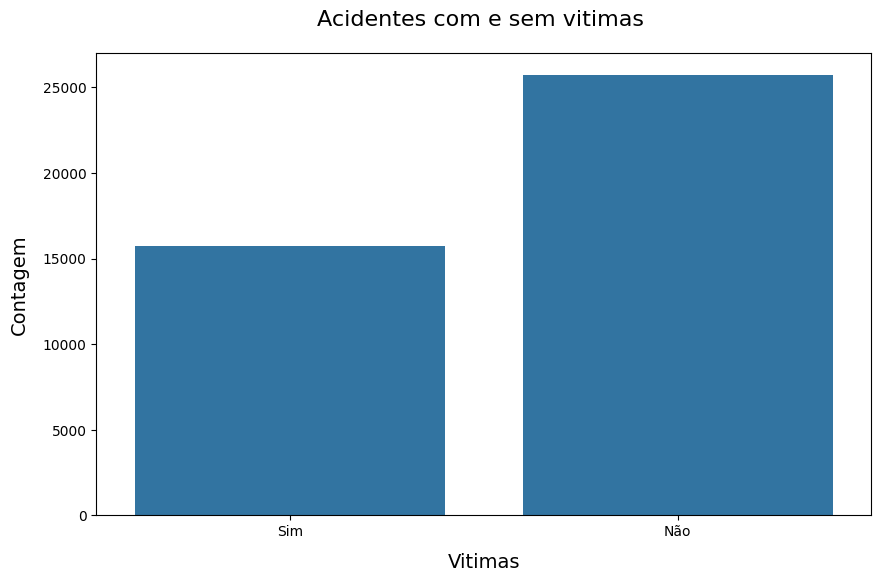

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

grafico_1 = sns.countplot(data = df_join, x = "cont_vit")
grafico_1.set_title('Acidentes com e sem vitimas ', fontsize=16, pad=20)
grafico_1.set_xlabel('Vitimas', fontsize=14, labelpad=10)
grafico_1.set_ylabel('Contagem', fontsize=14, labelpad=10)

print(df_join.groupby(['cont_vit']).size())

,carros,onibus,caminhao,moto
0,3898,39218.0,38215.0,28841.0
1,17222,2200.0,3140.0,12089.0
2,18182,36.0,97.0,520.0
3,1839,1.0,3.0,5.0
4,282,NaN,NaN,NaN
5,22,NaN,NaN,NaN
6,6,NaN,NaN,NaN
7,2,NaN,NaN,NaN
8,1,NaN,NaN,NaN
9,1,NaN,NaN,NaN


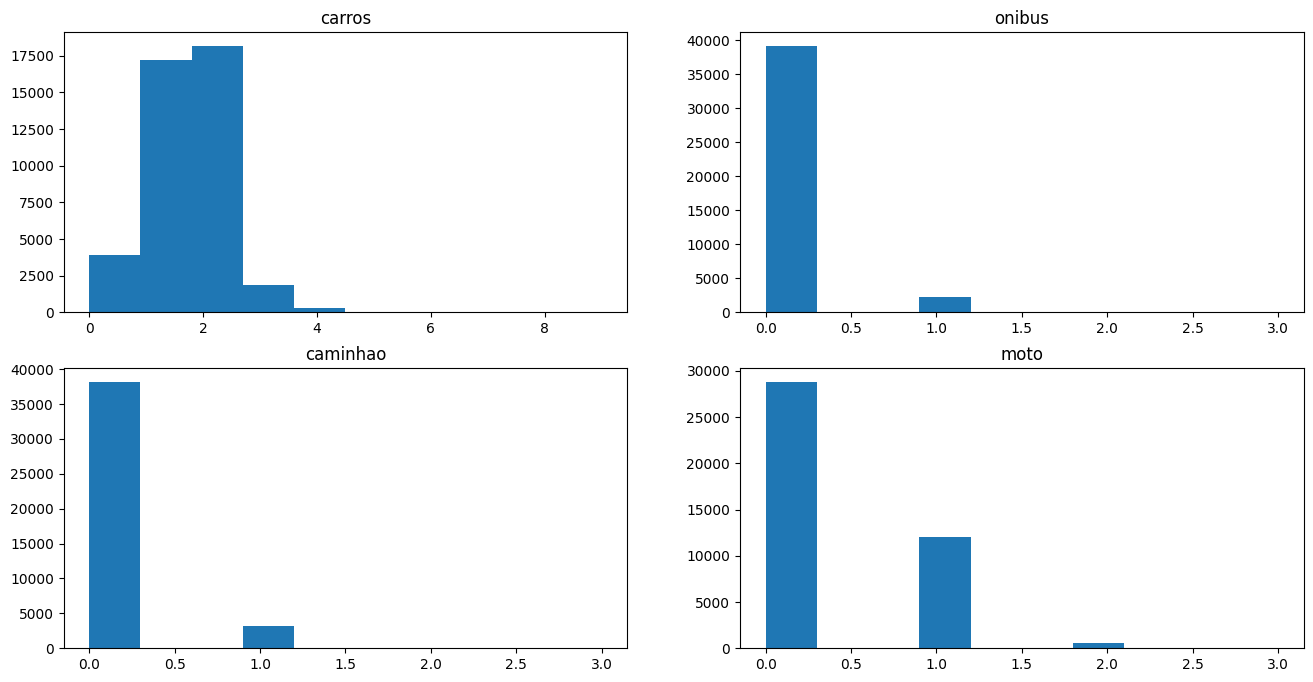

In [ ]:
#Distribuição das variáveis numéricas

fig, axs = plt.subplots(2, 2, figsize=(16, 8))


axs[0,0].hist(df_join['carros'])
axs[0,0].set_title('carros')
axs[0,1].hist(df_join['onibus'])
axs[0,1].set_title('onibus')
axs[1,0].hist(df_join['caminhao'])
axs[1,0].set_title('caminhao')
axs[1,1].hist(df_join['moto'])
axs[1,1].set_title('moto')

rotulos = pd.DataFrame({'carros': df_join.groupby(['carros']).size(),
                   'onibus': df_join.groupby(['onibus']).size(),
                   'caminhao': df_join.groupby(['caminhao']).size(),
                   'moto': df_join.groupby(['moto']).size()})

rotulos

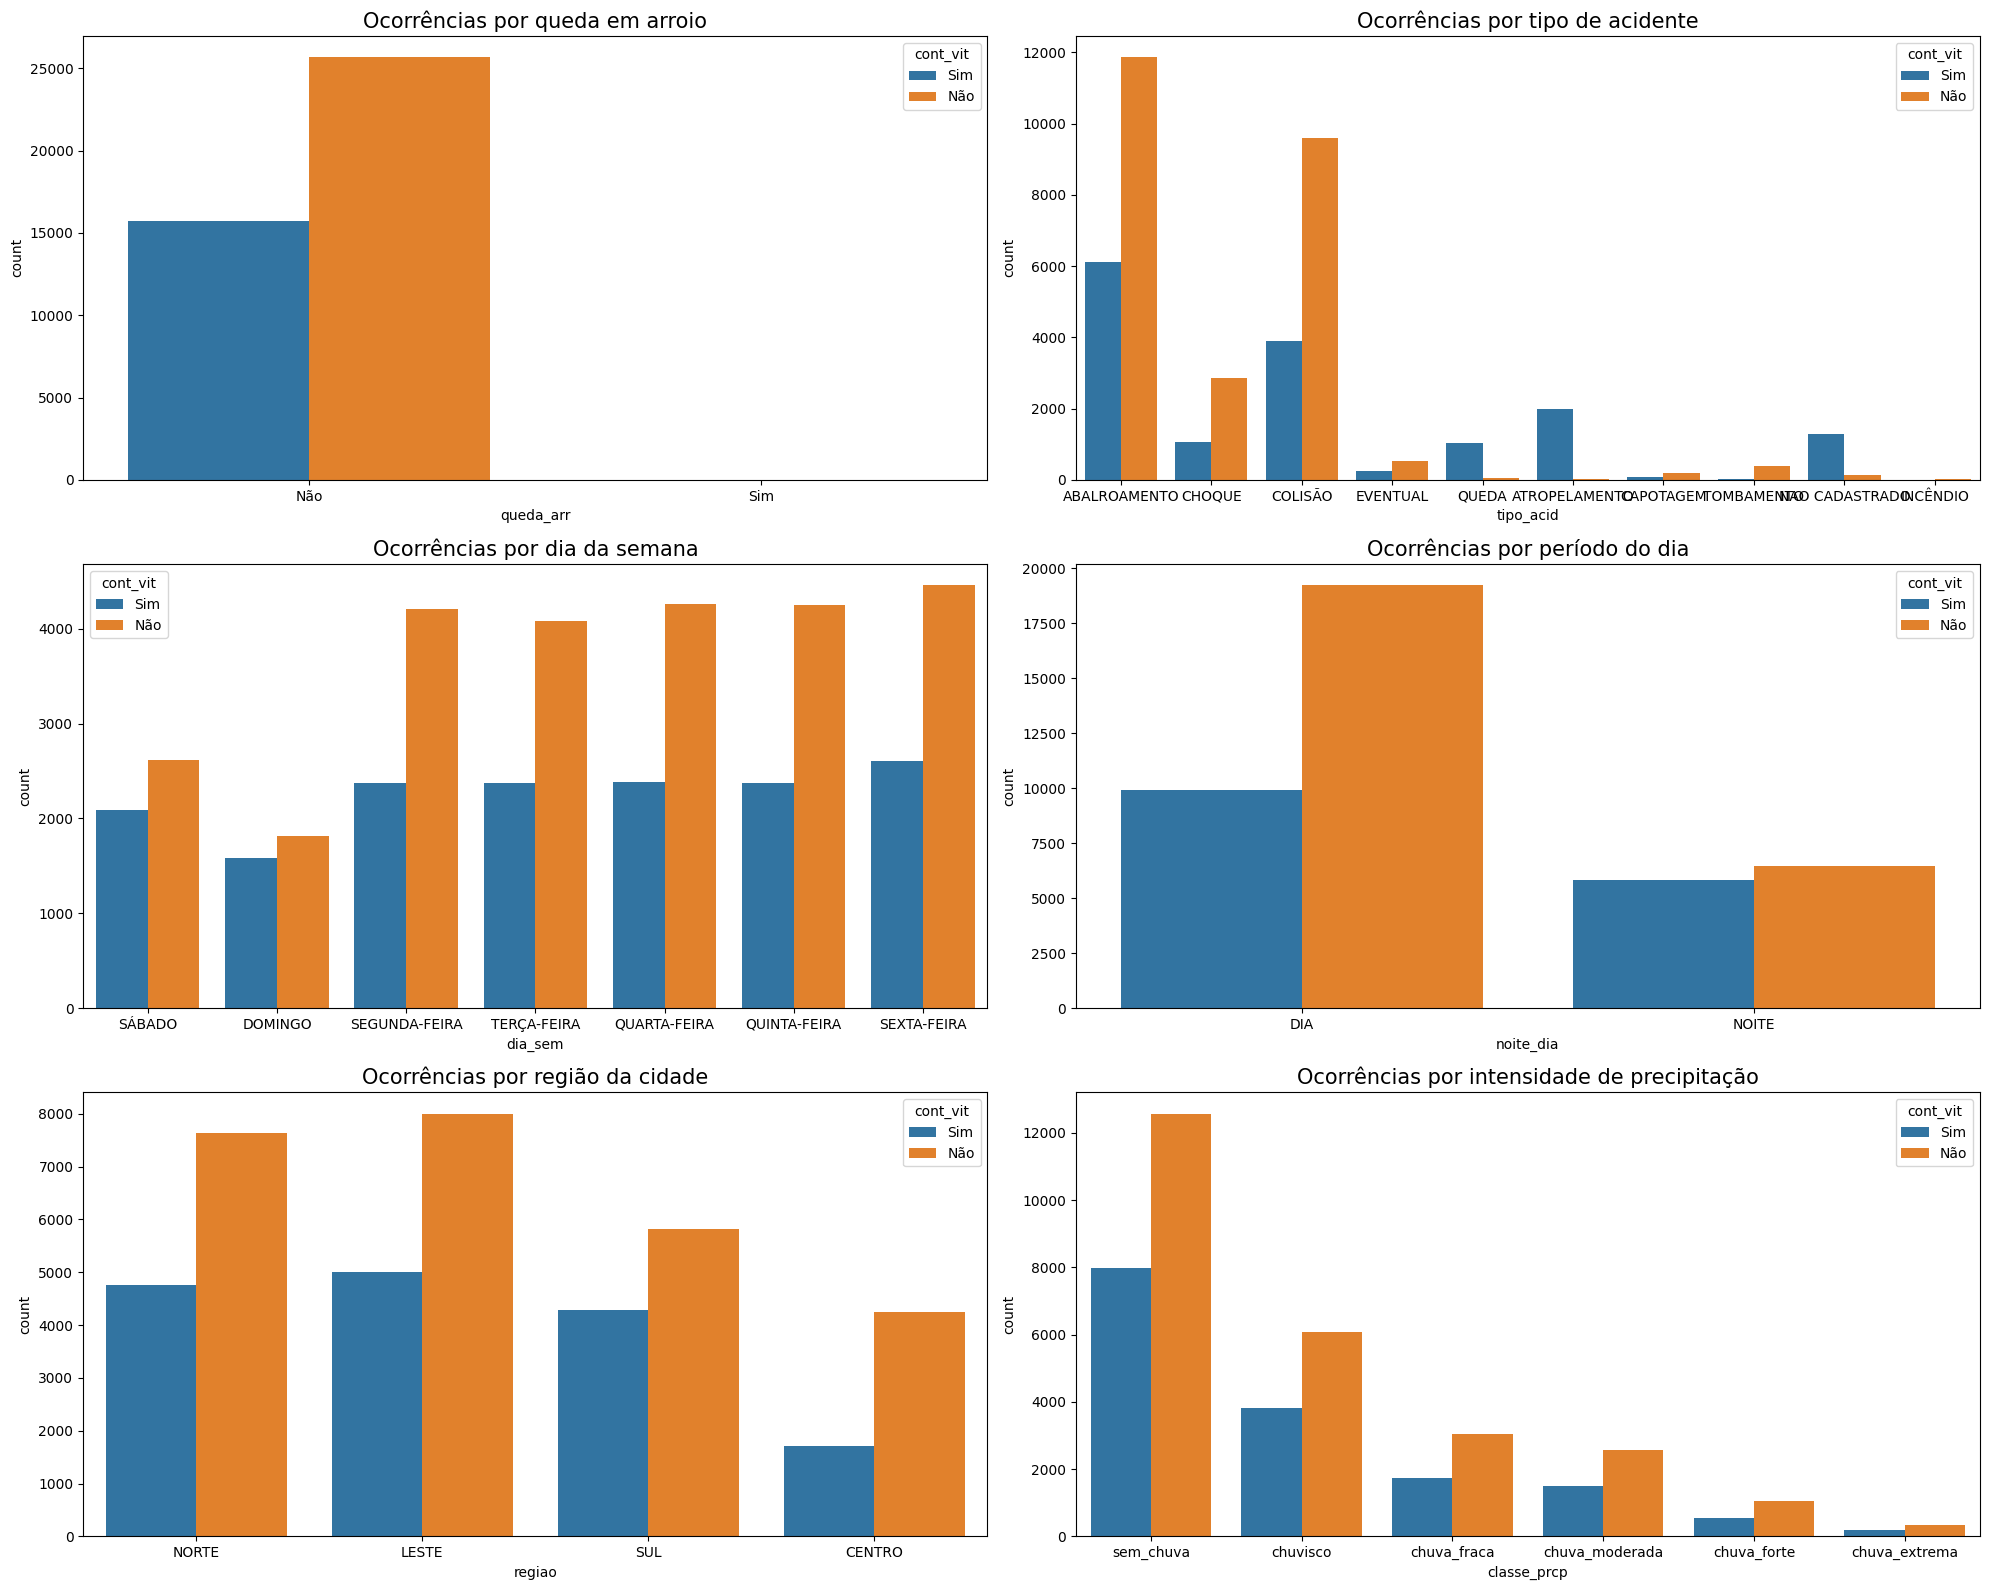

In [ ]:
#Ocorrências das classes do artributo-alvo em relação aos atributos categóricos

fig1, axs1 = plt.subplots(3, 2, figsize=(20, 16))

sns.countplot(x = df_join['queda_arr'], hue = df_join['cont_vit'], ax = axs1[0,0]).set_title('Ocorrências por queda em arroio', fontsize=15)
sns.countplot(x = df_join['tipo_acid'], hue = df_join['cont_vit'], ax = axs1[0,1]).set_title('Ocorrências por tipo de acidente', fontsize=15)
sns.countplot(x = df_join['dia_sem'], hue = df_join['cont_vit'], ax = axs1[1,0]).set_title('Ocorrências por dia da semana', fontsize=15)
sns.countplot(x = df_join['noite_dia'], hue = df_join['cont_vit'], ax = axs1[1,1]).set_title('Ocorrências por período do dia', fontsize=15)
sns.countplot(x = df_join['regiao'], hue = df_join['cont_vit'], ax = axs1[2,0]).set_title('Ocorrências por região da cidade', fontsize=15)
sns.countplot(x = df_join['classe_prcp'], hue = df_join['cont_vit'], ax = axs1[2,1]).set_title('Ocorrências por intensidade de precipitação', fontsize=15)

fig1.tight_layout()
plt.show()

# **5. Criação dos Modelos de Machine Learning**

##**5.1. Preparação das bases de atributos e variável-alvo**

In [ ]:
#Divisão de base de atributos e variável-alvo
X = df_join.drop(['queda_arr', 'data', 'auto', 'taxi', 'lotacao', 'onibus_urb', 'onibus_met', 'onibus_int', 'prcp', 'cont_vit'], axis=1)

X.head()

,caminhao,moto,tipo_acid,dia_sem,noite_dia,regiao,carros,onibus,classe_prcp
21991,1,0,ABALROAMENTO,SÁBADO,DIA,NORTE,3,0,sem_chuva
21993,0,1,ABALROAMENTO,SÁBADO,DIA,LESTE,1,0,sem_chuva
21995,0,0,ABALROAMENTO,SÁBADO,NOITE,SUL,2,0,sem_chuva
21997,0,0,CHOQUE,DOMINGO,DIA,SUL,1,0,chuva_fraca
21998,0,0,ABALROAMENTO,DOMINGO,DIA,CENTRO,2,0,chuva_fraca


In [ ]:
y = df_join['cont_vit']

y

21991    Sim
21993    Sim
21995    Sim
21997    Sim
21998    Sim
        ... 
64092    Sim
64093    Sim
64094    Sim
64095    Sim
64096    Sim
Name: cont_vit, Length: 41455, dtype: object

In [ ]:
#Codificação de variáveis categóricas (LabelEnconder)
from sklearn.preprocessing import LabelEncoder

label_encoder_tipo_acid = LabelEncoder()
label_encoder_dia_sem = LabelEncoder()
label_encoder_noite_dia = LabelEncoder()
label_encoder_regiao = LabelEncoder()
label_encoder_classe_prcp = LabelEncoder()

X['tipo_acid'] = label_encoder_tipo_acid.fit_transform(X['tipo_acid'])
X['dia_sem'] = label_encoder_dia_sem.fit_transform(X['dia_sem'])
X['noite_dia'] = label_encoder_noite_dia.fit_transform(X['noite_dia'])
X['regiao'] = label_encoder_regiao.fit_transform(X['regiao'])
X['classe_prcp'] = label_encoder_classe_prcp.fit_transform(X['classe_prcp'])

X.head()

,caminhao,moto,tipo_acid,dia_sem,noite_dia,regiao,carros,onibus,classe_prcp
21991,1,0,0,5,0,2,3,0,5
21993,0,1,0,5,0,1,1,0,5
21995,0,0,0,5,1,3,2,0,5
21997,0,0,3,0,0,3,1,0,2
21998,0,0,0,0,0,0,2,0,2


In [ ]:
#Divisão de base de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))

Base de treinamento:(29018, 9)
Base de teste:(12437, 9)


## **5.2. Modelo de Árvore de Decisão**

In [ ]:
#Importação de Bibliotecas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#Treinamento do modelo base
arvore_predict = DecisionTreeClassifier(random_state = 0)
arvore_predict.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Acurácia do modelo base

y_pred_tree1 = arvore_predict.predict(X_test)
print("Acuracia (base de teste):", accuracy_score(y_test, y_pred_tree1))

Acuracia (base de teste): 0.82101793036906


In [ ]:
arvore_predict.feature_importances_

array([0.06, 0.51, 0.13, 0.07, 0.02, 0.04, 0.09, 0.02, 0.05])

In [ ]:
ganho_info = pd.DataFrame(arvore_predict.feature_importances_, index = X.columns.values, columns=['Importancia']).sort_values(by = 'Importancia', ascending = False)
ganho_info

,Importancia
moto,0.51
tipo_acid,0.13
carros,0.09
dia_sem,0.07
caminhao,0.06
classe_prcp,0.05
regiao,0.04
onibus,0.02
noite_dia,0.02


In [ ]:
#Aplicação de grid search para testar parâmetros alternativos

parametros_tree = [
  {'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4], 'criterion': ['entropy', 'gini']}]

optimized_tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parametros_tree)
optimized_tree.fit(X_train, y_train)
best_params_tree = optimized_tree.best_params_
best_result_tree = optimized_tree.best_score_
print('A melhor combinação de hiperparâmetros testada foi: ', best_params_tree, "\n")
print('Melhor acurácia: ', best_result_tree)

A melhor combinação de hiperparâmetros testada foi:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2} 

Melhor acurácia:  0.8343441384022355


In [ ]:
optimized_tree1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 2, random_state = 0)
optimized_tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

In [ ]:
# Cross-validation

resultados_arvore = []

for i in range(10):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    scores = cross_val_score(optimized_tree1, X_test, y_test, cv=kfold)
    resultados_arvore.append(scores.mean())

result_cv_arvore=pd.DataFrame(resultados_arvore, columns = ['acuracia'])

def formatar(valor):
  return "{:,.5f}".format(valor)

result_cv_arvore['acuracia'] = result_cv_arvore['acuracia'].apply(formatar)
print(result_cv_arvore,"\n")

result_cv_arvore.acuracia =  result_cv_arvore.acuracia.astype('float64')
media_cv_arvore = result_cv_arvore['acuracia'].mean()
print("Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras:", media_cv_arvore)


  acuracia
0  0.83300
1  0.83428
2  0.83501
3  0.83477
4  0.83549
5  0.83477
6  0.83525
7  0.83517
8  0.83485
9  0.83509 

Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras: 0.8347680000000001


Classificador majoritário (classe com maior frequência):cont_vit    0.62
dtype: float64 

Acuracia (base de teste): 0.8347672268231888

Classification report: 

              precision    recall  f1-score   support

         Não       0.84      0.90      0.87      7664
         Sim       0.82      0.73      0.77      4773

    accuracy                           0.83     12437
   macro avg       0.83      0.82      0.82     12437
weighted avg       0.83      0.83      0.83     12437



Matriz de Confusão: 

[[6883  781]
 [1274 3499]] 
 





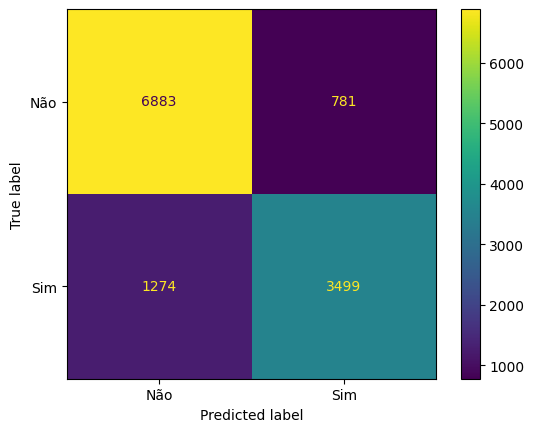

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Classification report

freq_output = pd.DataFrame(y.value_counts(normalize = True))
freq_output.max()
print("Classificador majoritário (classe com maior frequência):{0}".format(freq_output.max()),"\n")

y_pred_tree2 = optimized_tree1.predict(X_test)
print("Acuracia (base de teste):", accuracy_score(y_test, y_pred_tree2))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred_tree2))
print("\n")

cnf_matrix = confusion_matrix(y_test, y_pred_tree2)
cnf_table = pd.DataFrame(data=cnf_matrix, index = [x + "(real)" for x in optimized_tree1.classes_],
                         columns = [x + "(prev)" for x in optimized_tree1.classes_])
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=optimized_tree1.classes_)

print('Matriz de Confusão: \n' )
print(cnf_matrix, '\n \n')

print(cnf_disp)
print("\n")
cnf_disp.plot()
plt.figure(figsize=(12,8))
plt.show()

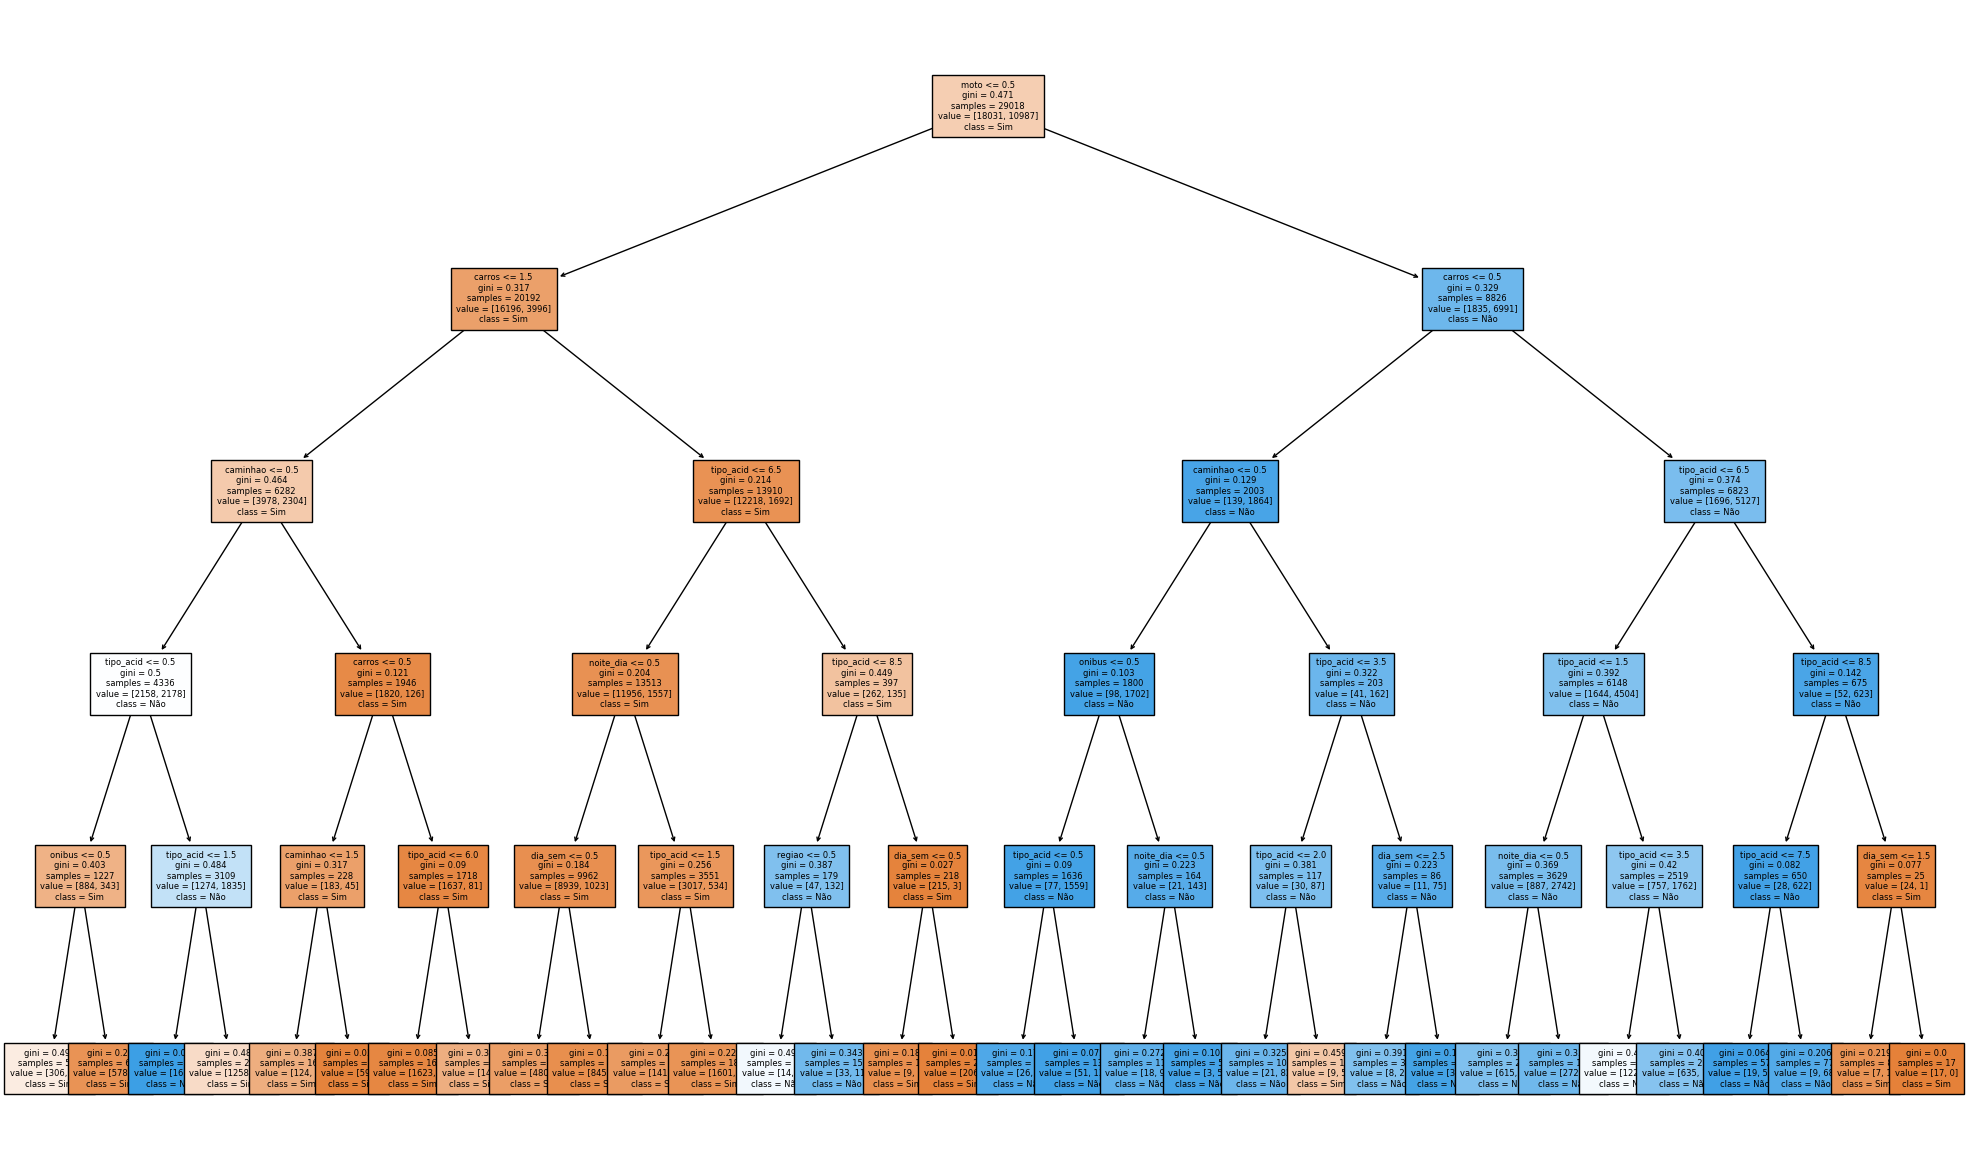

In [ ]:
# Plotagem da Árvore

fig_tree = plt.figure(figsize = (25,15))
_ = tree.plot_tree(optimized_tree1, feature_names = X.columns, class_names = ['Sim', 'Não'], filled = True, fontsize=6)

## **5.3. Modelo de Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Treinamento do modelo base
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Cross-validation

resultados_log = []

for i in range(10):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    scores = cross_val_score(logistic_reg, X_test, y_test, cv=kfold)
    resultados_log.append(scores.mean())

result_cv_log=pd.DataFrame(resultados_log, columns = ['acuracia'])

result_cv_log['acuracia'] = result_cv_log['acuracia'].apply(formatar)
print(result_cv_log,"\n")

result_cv_log.acuracia =  result_cv_log.acuracia.astype('float64')
media_cv_log = result_cv_log['acuracia'].mean()
print("Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras:", media_cv_log)

  acuracia
0  0.80678
1  0.80711
2  0.80856
3  0.80719
4  0.80727
5  0.80775
6  0.80687
7  0.80751
8  0.80783
9  0.80614 

Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras: 0.807301


Classificador majoritário (classe com maior frequência):cont_vit    0.62
dtype: float64 

Acuracia (base de teste): 0.8054193133392297

Classification report: 

              precision    recall  f1-score   support

         Não       0.81      0.89      0.85      7664
         Sim       0.79      0.67      0.73      4773

    accuracy                           0.81     12437
   macro avg       0.80      0.78      0.79     12437
weighted avg       0.80      0.81      0.80     12437



Matriz de Confusão: 

[[6803  861]
 [1559 3214]] 
 





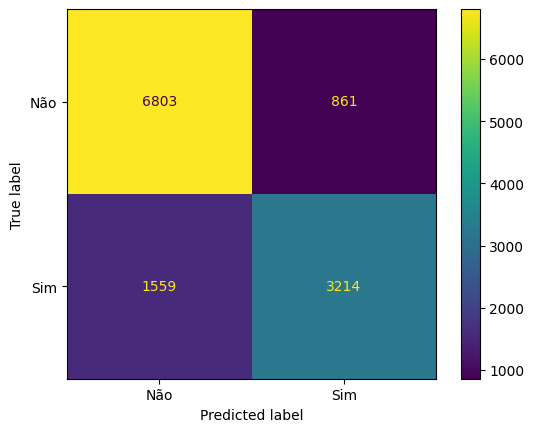

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Classification report

print("Classificador majoritário (classe com maior frequência):{0}".format(freq_output.max()),"\n")

y_pred_log = logistic_reg.predict(X_test)
print("Acuracia (base de teste):", accuracy_score(y_test, y_pred_log))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred_log))
print("\n")


cnf_matrix_log = confusion_matrix(y_test, y_pred_log)
cnf_table_log = pd.DataFrame(data=cnf_matrix_log, index = [x + "(real)" for x in logistic_reg.classes_]
                             , columns = [x + "(prev)" for x in logistic_reg.classes_])
cnf_disp_log = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_log, display_labels=logistic_reg.classes_)

print('Matriz de Confusão: \n' )
print(cnf_matrix_log, '\n \n')

print(cnf_disp_log)
print("\n")
cnf_disp_log.plot()
plt.figure(figsize=(12,8))
plt.show()

## **5.4. Modelo Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Treinamento do modelo
naive_predict  = GaussianNB()
naive_predict.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Cross-validation

resultados_naive = []

for i in range(10):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    scores = cross_val_score(naive_predict, X_test, y_test, cv=kfold)
    resultados_naive.append(scores.mean())

result_cv_naive=pd.DataFrame(resultados_naive, columns = ['acuracia'])

result_cv_naive['acuracia'] = result_cv_naive['acuracia'].apply(formatar)
print(result_cv_naive,"\n")

result_cv_naive.acuracia =  result_cv_naive.acuracia.astype('float64')
media_cv_naive = result_cv_naive['acuracia'].mean()
print("Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras:", media_cv_naive)

  acuracia
0  0.78805
1  0.78700
2  0.78580
3  0.78508
4  0.78741
5  0.78685
6  0.78677
7  0.78548
8  0.78781
9  0.78540 

Acurácia média do modelo sobre a base de teste, com validação cruzada de 10 dobras: 0.7865650000000001


Classificador majoritário (classe com maior frequência):cont_vit    0.62
dtype: float64 

Acuracia (base de teste): 0.7989868939454853

Classification report: 

              precision    recall  f1-score   support

         Não       0.81      0.88      0.84      7664
         Sim       0.77      0.68      0.72      4773

    accuracy                           0.80     12437
   macro avg       0.79      0.78      0.78     12437
weighted avg       0.80      0.80      0.80     12437



Matriz de Confusão: 

[[6706  958]
 [1542 3231]] 
 





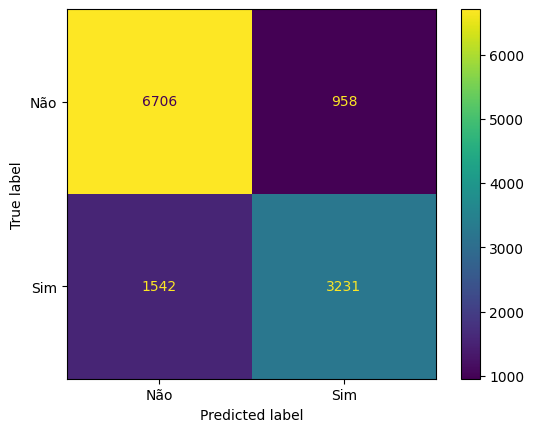

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Classification report

print("Classificador majoritário (classe com maior frequência):{0}".format(freq_output.max()),"\n")

y_pred_naive = naive_predict.predict(X_test)
print("Acuracia (base de teste):", accuracy_score(y_test, y_pred_naive))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred_naive))
print("\n")

cnf_matrix_naive = confusion_matrix(y_test, y_pred_naive)
cnf_table_naive = pd.DataFrame(data=cnf_matrix_naive, index = [x + "(real)" for x in naive_predict.classes_]
                               , columns = [x + "(prev)" for x in naive_predict.classes_])
cnf_disp_naive = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_naive, display_labels=naive_predict.classes_)

print('Matriz de Confusão: \n' )
print(cnf_matrix_naive, '\n \n')

print(cnf_disp_naive)
print("\n")
cnf_disp_naive.plot()
plt.figure(figsize=(12,8))
plt.show()

## **5.5. Resumo das Métricas de Desempenho dos Modelos**


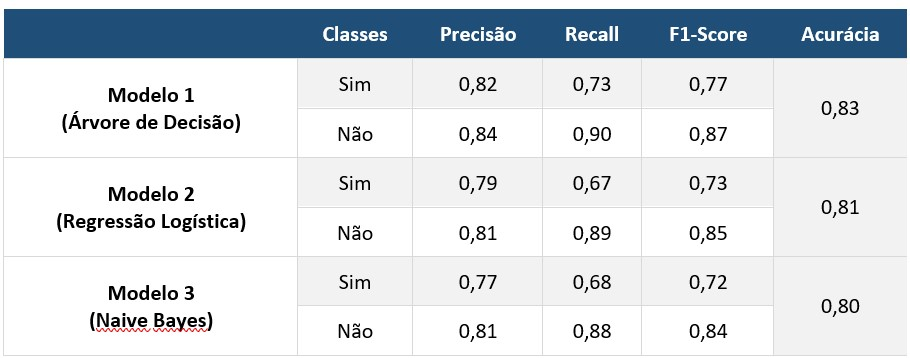

# **6. Curvas ROC AUC**

In [ ]:
#Preparo da base y_test

y_test1 = y_test.map({'Não': 0, 'Sim': 1})

y_test1

26780    0
59921    0
50865    1
46378    0
26289    0
        ..
51109    0
25751    0
38319    1
46689    1
34551    0
Name: cont_vit, Length: 12437, dtype: int64

In [ ]:
# Importação de biblioteca necessária e cração de função para plotagem das curvas

from sklearn import metrics

def plot_roc_curve(fp, tp):
    plt.figure(figsize=(12,8))
    plt.plot(fp, tp, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC Curve", fontsize = 16)
    plt.legend()
    plt.show()

## **6.1. Curva ROC - Modelo Árvore de Decisão**

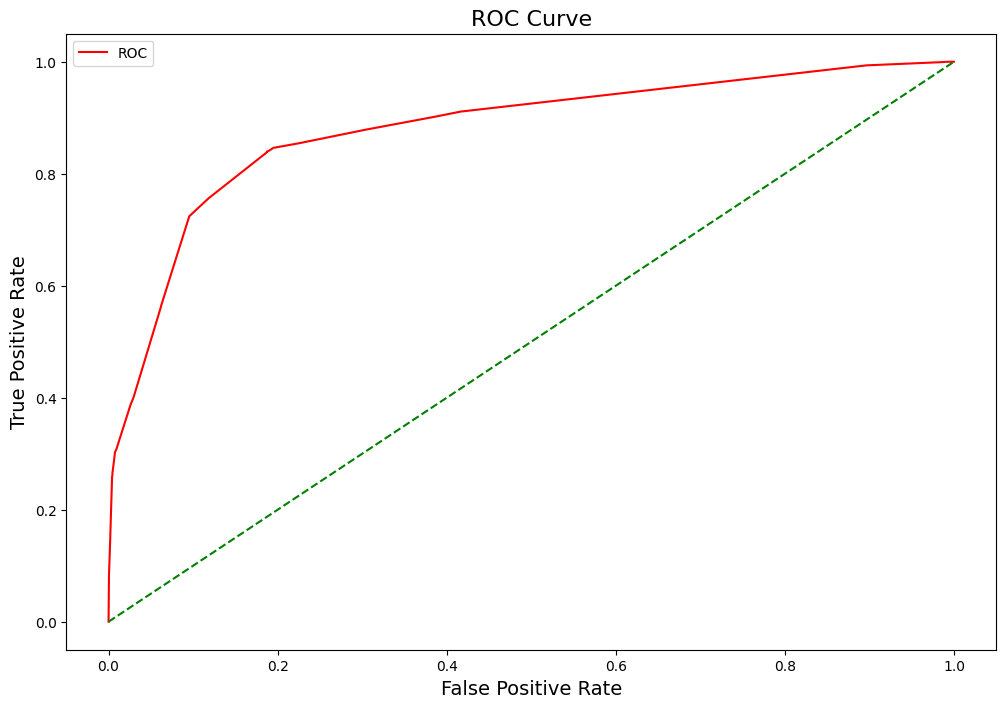

AUC =  0.8797240627407035 



<Figure size 1200x800 with 0 Axes>

In [ ]:
#Curva ROC - Mddelo Árvore de Decisão

prob_tree = optimized_tree1.predict_proba(X_test)
prob_tree = prob_tree[:, 1]
fp, tp, thresholds = roc_curve(y_test1, prob_tree)
plot_roc_curve(fp, tp)
plt.figure(figsize=(12,8))


print("AUC = ", metrics.auc(fp, tp), "\n")

## **6.2. Curva ROC - Modelo Regressão Logística**


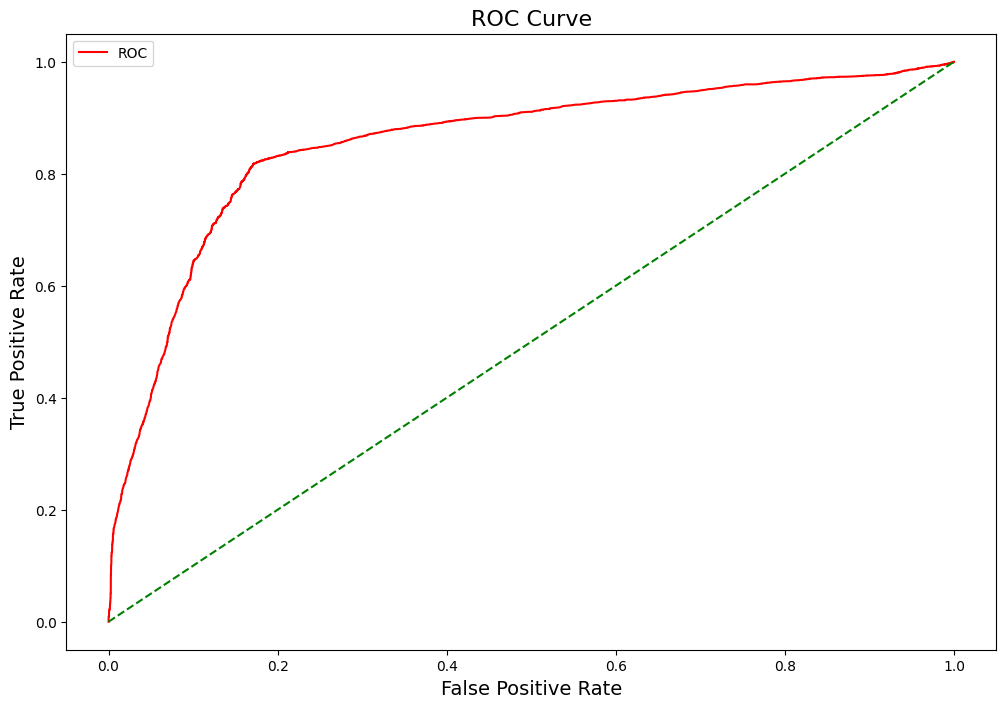

AUC =  0.8561034073229418 



In [ ]:
#Curva ROC - Mddelo Regressão Logística

prob_log = logistic_reg.predict_proba(X_test)
prob_log = prob_log[:, 1]
fp, tp, thresholds = roc_curve(y_test1, prob_log)
plot_roc_curve(fp, tp)

print("AUC = ", metrics.auc(fp, tp), "\n")

## **6.3. Curva ROC - Modelo Naive Bayes**

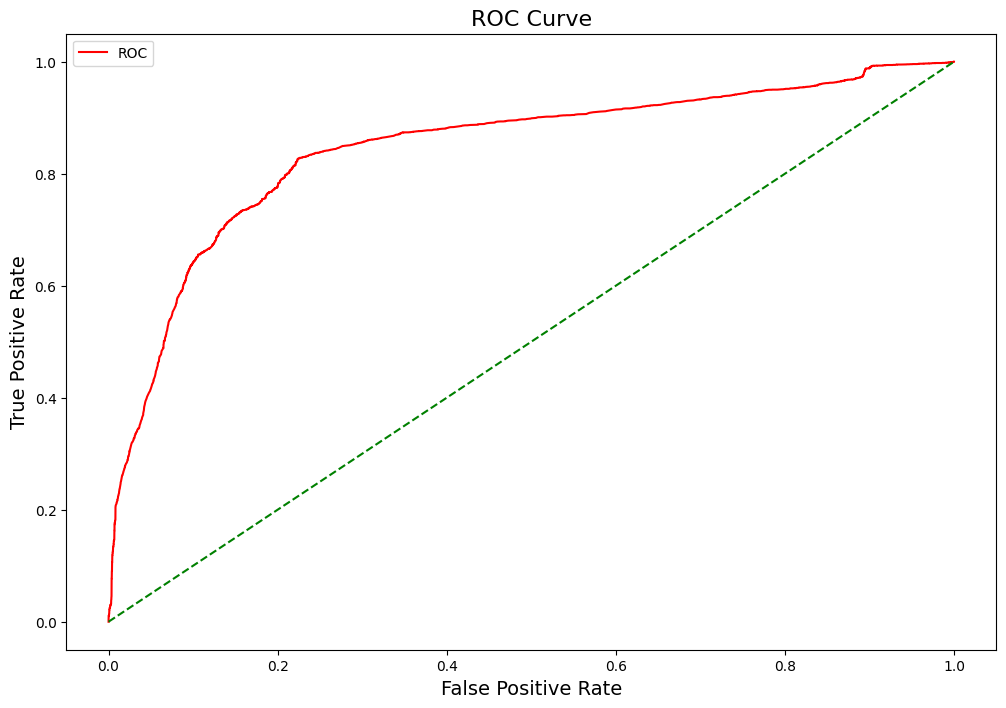

AUC =  0.8450802252099164 



In [ ]:
#Curva ROC - Mddelo Regressão Logística

prob_naive = naive_predict.predict_proba(X_test)
prob_naive = prob_naive[:, 1]
fp, tp, thresholds = roc_curve(y_test1, prob_naive)
plot_roc_curve(fp, tp)

print("AUC = ", metrics.auc(fp, tp), "\n")